In [2]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("TRAIN2.csv")
test = pd.read_csv("TEST2.csv")

In [5]:
print(train.shape,test.shape)

(900, 7) (149, 4)


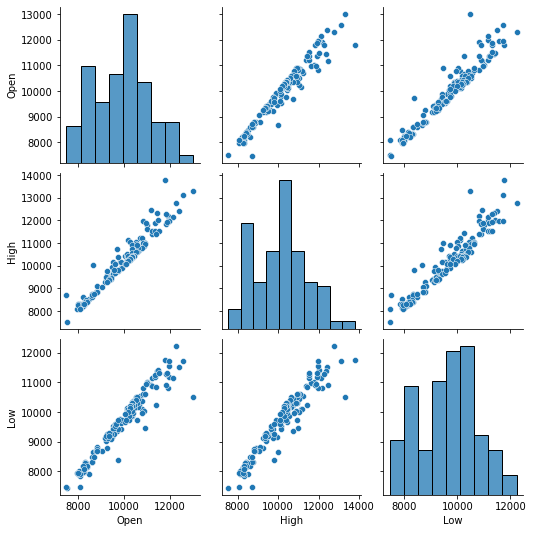

In [6]:
test1 = test
import seaborn as snb
snb.pairplot(test1)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train["Date"])
encode_labels = encoder.transform(train["Date"])

In [11]:
train["Date"] = encode_labels

In [12]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,963.66,1003.08,958.70,998.33,998.33,147775008
1,1,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,3,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,4,1156.73,1191.10,910.42,1013.38,1013.38,510199008


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(test1["Date"])
encode_labels1 = encoder1.transform(test1["Date"])

In [14]:
test1["Date"] = encode_labels1
test1

,Date,Open,High,Low
0,0,9273.06,9594.42,9232.48
1,1,9525.07,10144.56,9525.07
2,2,10175.92,11157.35,10107.04
3,3,10696.69,11246.14,10556.10
4,4,10853.74,11065.90,10610.43
...,...,...,...,...
144,144,9056.92,9081.28,8700.61
145,145,8759.75,8853.77,8685.43
146,146,8812.03,8836.84,8761.65
147,147,8811.94,8826.94,8692.55


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
encoder2.fit(train["Close"])
encode_labels2 = encoder2.transform(train["Close"])

In [16]:
train["Close"] = encode_labels2

In [17]:
train["Close"].head()

0    34
1    41
2    51
3    75
4    40
Name: Close, dtype: int64

In [18]:
features = train.drop(["Close","Adj Close","Volume"],axis = 1)

In [19]:
target = train["Close"]
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(features,target)

ExtraTreesRegressor()

[0.05688602 0.30328938 0.30569678 0.33412783]


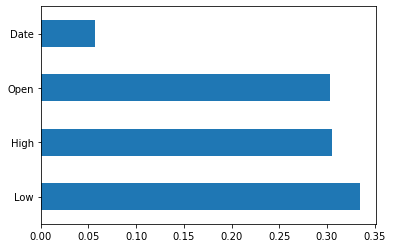

In [22]:
print(model.feature_importances_)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.165,random_state = 40)

feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [24]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
## Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
rf = RandomForestRegressor()

In [29]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [34]:
predictions=rf_random.predict(x_test)

/home/bash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

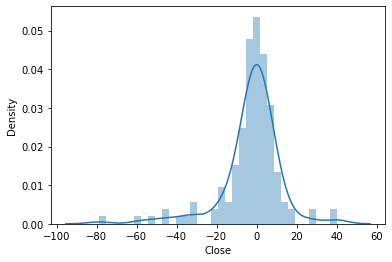

In [36]:
snb.distplot(y_test-predictions)

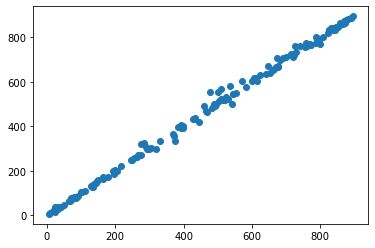

In [37]:
plt.scatter(y_test,predictions)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.051476510067111
MSE: 230.74943840268446
RMSE: 15.19043904575126


In [40]:
errors = abs(predictions - y_test)

In [42]:
#mape=mean absolute percentage error
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.61 %.


In [59]:
predictions[0:100]
bitcoin_predict = model.predict(test1)

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(bitcoin_predict)
encode_labels1 = encoder1.transform(bitcoin_predict)

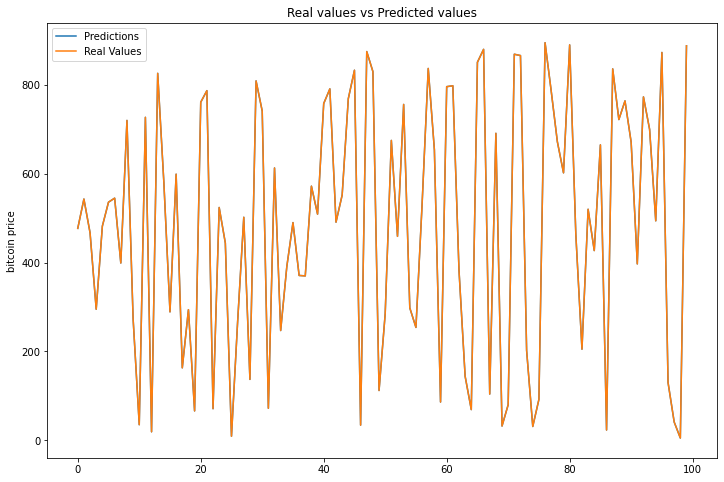

In [60]:
# Saving the model
import pickle
filename = 'lr_modelo.sav'
pickle.dump(model, open(filename,'wb'))

# Loading the model and forecasting with new datasets
# (X_test, Y_test must be new datasets prepared with the proper cleanup and transformation procedure)

load_model = pickle.load(open(filename, 'rb'))
results = load_model.predict(x_test[:100])
plt.figure(figsize=(12,8))

plt.title('Real values vs Predicted values')
plt.ylabel('bitcoin price')
plt.plot(results) #x_test
plt.plot(y_test.values[:100]) #y_test. 100 first values

plt.legend(['Predictions', 'Real Values'])
plt.show()

In [61]:
test2 = pd.read_csv('TEST2.csv')

In [62]:
bitcoin_submission = pd.DataFrame()
bitcoin_submission["Date"] = test2["Date"]
bitcoin_submission["Close"] = encode_labels1

In [63]:
bitcoin_submission

,Date,Close
0,2019-06-20,43
1,2019-06-21,60
2,2019-06-22,98
3,2019-06-23,113
4,2019-06-24,111
...,...,...
144,2019-11-11,31
145,2019-11-12,33
146,2019-11-13,34
147,2019-11-14,32


In [64]:
bitcoin_submission.to_csv("btc1.csv")